In [1]:
#import Neccessary Packages 
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
#importing the required Data set 
dfTrain = pd.read_csv('train_indessa.csv')

In [ ]:
#strip off the textual part for better conversion of Categorical Values to Numerical Values
dfTrain['term'].replace(to_replace=' months', value='', regex=True, inplace=True)

dfTrain['term'] = pd.to_numeric(dfTrain['term'], errors='coerce')

In [ ]:
dfTrain['emp_length'].replace('n/a', '0', inplace=True)
dfTrain['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)

dfTrain['emp_length'] = pd.to_numeric(dfTrain['emp_length'], errors='coerce')

In [ ]:
dfTrain['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
dfTrain['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)

dfTrain['last_week_pay'] = pd.to_numeric(dfTrain['last_week_pay'], errors='coerce')

In [ ]:
#replcaing the grades into numerical values
dfTrain['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)

dfTrain['sub_grade'] = pd.to_numeric(dfTrain['sub_grade'],errors = 'coerce') 

In [ ]:
#Filling the missing values
cols = ['term', 'loan_amnt', 'funded_amnt','funded_amnt_inv', 'last_week_pay', 'int_rate', 'sub_grade', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length']
for col in cols:
    dfTrain[col].fillna(dfTrain[col].median(), inplace=True)

cols = ['acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med']
for col in cols:
    dfTrain[col].fillna(0, inplace=True)

In [ ]:
# Feature Enginnering
train_target = pd.DataFrame(dfTrain['loan_status'])

selected_cols = ['member_id', 'emp_length', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'int_rate', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'mths_since_last_major_derog', 'last_week_pay', 'tot_cur_bal', 'total_rev_hi_lim', 'tot_coll_amt', 'recoveries', 'collection_recovery_fee', 'term', 'acc_now_delinq', 'collections_12_mths_ex_med']
finalTrain = dfTrain[selected_cols]

#finding the loan to income ratio by dividing the annual income to funded amount investor
finalTrain['loan_to_income'] = finalTrain['annual_inc']/finalTrain['funded_amnt_inv']

#finding the bad state and intializing the values to be binary by using 1 and 0 to represent whether the thing has gone bad.
finalTrain['bad_state'] = finalTrain['acc_now_delinq'] + (finalTrain['total_rec_late_fee']/finalTrain['funded_amnt_inv']) + (finalTrain['recoveries']/finalTrain['funded_amnt_inv']) + (finalTrain['collection_recovery_fee']/finalTrain['funded_amnt_inv']) + (finalTrain['collections_12_mths_ex_med']/finalTrain['funded_amnt_inv'])

finalTrain.loc[finalTrain['bad_state'] > 0, 'bad_state'] = 1

#these represent the unused credit lines
finalTrain['avl_lines'] = finalTrain['total_acc'] - finalTrain['open_acc']

#int_paid represents the interest paid
finalTrain['int_paid'] = finalTrain['total_rec_int'] + finalTrain['total_rec_late_fee']

#EMI Paid progress percetntage by calculating the last week pay by the term period
finalTrain['emi_paid_progress_perc'] = ((finalTrain['last_week_pay']/(finalTrain['term']/12*52+1))*100)

#Total Repayment Progress 
finalTrain['total_repayment_progress'] = ((finalTrain['last_week_pay']/(finalTrain['term']/12*52+1))*100) + ((finalTrain['recoveries']/finalTrain['funded_amnt_inv']) * 100)

C:\Users\ajay2\AppData\Local\Temp\ipykernel_7124\3218591.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalTrain['loan_to_income'] = finalTrain['annual_inc']/finalTrain['funded_amnt_inv']
C:\Users\ajay2\AppData\Local\Temp\ipykernel_7124\3218591.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalTrain['bad_state'] = finalTrain['acc_now_delinq'] + (finalTrain['total_rec_late_fee']/finalTrain['funded_amnt_inv']) + (finalTrain['recoveries']/finalTrain['funded_amnt_inv']) + (finalTrain['collection_r

In [ ]:
#Splitting the Data set into testing and training for prediction
X_train, X_test, y_train, y_test = train_test_split(np.array(finalTrain), np.array(train_target), test_size=0.30)
eval_set=[(X_test, y_test)]

In [ ]:
#finding the Null values whther they are available
finalTrain.isnull().sum()

member_id                        0
emp_length                       0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
sub_grade                        0
int_rate                         0
annual_inc                       0
dti                              0
mths_since_last_delinq           0
mths_since_last_record           0
open_acc                         0
revol_bal                        0
revol_util                       0
total_acc                        0
total_rec_int                    0
total_rec_late_fee               0
mths_since_last_major_derog      0
last_week_pay                    0
tot_cur_bal                      0
total_rev_hi_lim                 0
tot_coll_amt                     0
recoveries                       0
collection_recovery_fee          0
term                             0
acc_now_delinq                   0
collections_12_mths_ex_med       0
loan_to_income                   0
bad_state           

In [ ]:
finalTrain.isnull().values.any()

True

In [ ]:
finalTrain['total_repayment_progress'].fillna(0,inplace = True)

C:\Users\ajay2\AppData\Local\Temp\ipykernel_7124\2378622525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalTrain['total_repayment_progress'].fillna(0,inplace = True)


In [ ]:
finalTrain['bad_state'].fillna(0,inplace = True)

C:\Users\ajay2\AppData\Local\Temp\ipykernel_7124\469964713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalTrain['bad_state'].fillna(0,inplace = True)


In [ ]:
#CatBoost is the Classifier used for predicting the Values as it provides the most accurate prediction. The other models like XgBoost, Gaussian Boost, Light Gradient Boosting.
from catboost import CatBoostClassifier
cat_clf = CatBoostClassifier(learning_rate=0.1, n_estimators=1400, subsample=0.70, max_depth=6, scale_pos_weight=2.5, silent=True)
#fiting the model witht the Xtrain and Ytrain
cat_clf.fit(X_train, y_train)

In [ ]:
#By comparing the YTrain and YPredicted Values we are able to derive the accuracy.
y_pred = cat_clf.predict(X_train)
print("==========================")
print('Train Accuracy: %.10f%%' % (accuracy_score(y_train, y_pred) *100.0))

Train Accuracy: 94.3791102203%


In [ ]:
#ROC_AUC provides us with the Ytrain and Ypred value provides the replation between true postive rate and false positive rate
roc_auc = roc_auc_score(y_train, y_pred)
print("AUC-ROC: %.10f%%" % (roc_auc * 100))

AUC-ROC: 94.1666228692%


In [ ]:
#Measure the trade off between the precision and recall by YTrain and YPred
from sklearn.metrics import average_precision_score  

pr_auc = average_precision_score(y_train,y_pred)
print("AUC-PR: %.10f%%" % (pr_auc * 100))

AUC-PR: 80.4814688918%


In [ ]:
#plotting the graph for better understanding of the AUC_ROC and AUC_PC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,precision_recall_curve

fpr, tpr, thresholds = roc_curve(y_train, y_pred) 
auc_roc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(y_train, y_pred)
auc_pr = auc(precision, recall)



Matplotlib is building the font cache; this may take a moment.


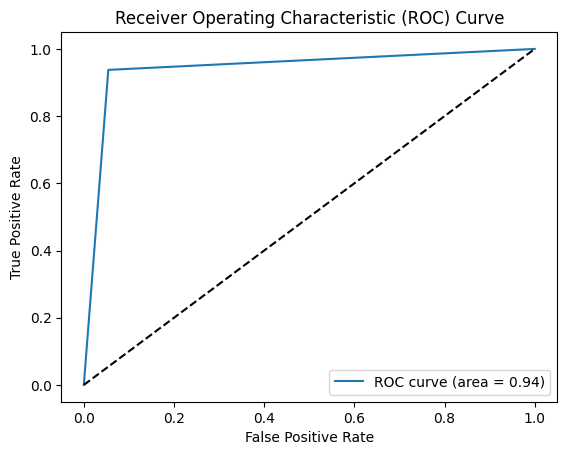

In [ ]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line indicating random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()

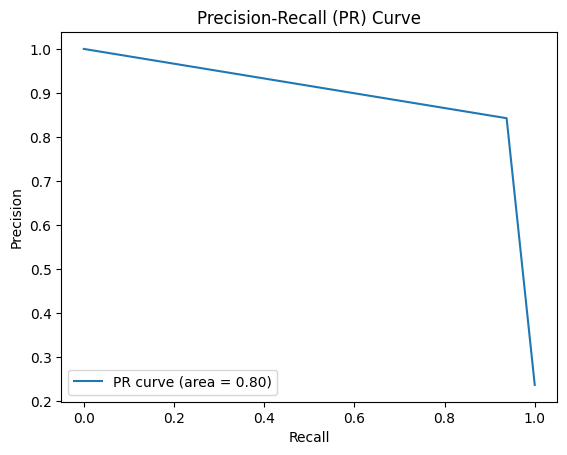

In [ ]:
plt.figure()
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc="lower left")

plt.show()

In [4]:
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: !pip install prettytable

x = PrettyTable()
x.field_names = ["Model Used", "ROC-AUC","Test Accuracy(%)", "PR-AUC"]

x.add_row(["CatBoost Classifier",  94.37, 94.16, 80.48])
x.add_row(["XGBoost Classifier",  92.61, 89.81, 74.87])

print(x)

+---------------------+---------+------------------+--------+
|      Model Used     | ROC-AUC | Test Accuracy(%) | PR-AUC |
+---------------------+---------+------------------+--------+
| CatBoost Classifier |  94.37  |      94.16       | 80.48  |
|  XGBoost Classifier |  92.61  |      89.81       | 74.87  |
+---------------------+---------+------------------+--------+
